In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('./dataset_finale.csv')
data.dropna(inplace=True, axis=1)
data.head()

,zone,AP_SMART25,itis-wifi2,AP_ITISLI03_5.0,AP_ITISLI02,AP_ITISLI03_2.5,itis-wifi,wifi-itis,itis-pvt,wifi-lab01,AP_SMART50
0,Aula3_0_1,-95.0,-101.2,-95.0,-95.0,-37.8,-90.6,-110.2,-110.2,-101.6,-95.0
1,Aula3_0_1,-95.0,-101.2,-95.0,-95.0,-37.8,-90.6,-95.0,-110.2,-110.6,-95.0
2,Aula3_0_1,-95.0,-91.8,-95.0,-95.0,-38.6,-98.8,-95.0,-100.4,-110.6,-95.0
3,Aula3_0_1,-95.0,-91.8,-95.0,-95.0,-39.0,-98.8,-95.0,-100.4,-100.8,-95.0
4,Aula3_0_1,-95.0,-91.8,-95.0,-95.0,-39.4,-100.4,-111.4,-89.4,-92.2,-95.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


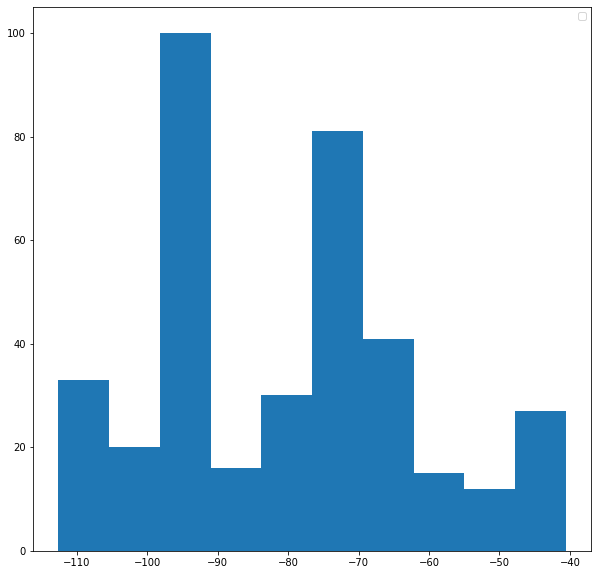

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.hist(data['itis-pvt'])
plt.legend()
plt.show()


In [7]:
features = data.columns.values
features = features[np.logical_and(features != 'zone', np.logical_and(features != 'AP_SMART25',
                                   np.logical_and(features != 'AP_ITISLI03_5.0', np.logical_and(features != 'AP_ITISLI02',
                                   features != 'AP_SMART50'))))]
features

array(['itis-wifi2', 'AP_ITISLI03_2.5', 'itis-wifi', 'wifi-itis',
       'itis-pvt', 'wifi-lab01'], dtype=object)

In [8]:
data[data['zone'] == 'Aula3_0_1'].describe()

,AP_SMART25,itis-wifi2,AP_ITISLI03_5.0,AP_ITISLI02,AP_ITISLI03_2.5,itis-wifi,wifi-itis,itis-pvt,wifi-lab01,AP_SMART50
count,25.000000,25.00000,25.0,25.0,25.000000,25.000000,25.000000,25.00000,25.000000,25.0
mean,-97.560000,-95.46400,-95.0,-95.0,-39.816000,-102.888000,-96.536000,-95.18400,-100.672000,-95.0
std,5.225578,9.52098,0.0,0.0,3.020993,7.269131,8.154083,11.48389,9.923185,0.0
min,-107.800000,-111.00000,-95.0,-95.0,-46.200000,-111.800000,-111.400000,-110.20000,-111.400000,-95.0
25%,-95.000000,-101.20000,-95.0,-95.0,-40.200000,-111.400000,-102.000000,-100.80000,-110.600000,-95.0
50%,-95.000000,-95.00000,-95.0,-95.0,-38.600000,-102.400000,-95.000000,-95.00000,-101.600000,-95.0
75%,-95.000000,-91.80000,-95.0,-95.0,-37.800000,-98.800000,-91.800000,-89.40000,-100.400000,-95.0
max,-95.000000,-81.60000,-95.0,-95.0,-37.000000,-90.600000,-81.200000,-70.60000,-73.400000,-95.0


In [9]:
data = data[['itis-wifi2', 'AP_ITISLI03_2.5', 'itis-wifi', 'itis-pvt',
       'wifi-itis', 'wifi-lab01', 'zone']]
data


,itis-wifi2,AP_ITISLI03_2.5,itis-wifi,itis-pvt,wifi-itis,wifi-lab01,zone
0,-101.2,-37.8,-90.6,-110.2,-110.2,-101.6,Aula3_0_1
1,-101.2,-37.8,-90.6,-110.2,-95.0,-110.6,Aula3_0_1
2,-91.8,-38.6,-98.8,-100.4,-95.0,-110.6,Aula3_0_1
3,-91.8,-39.0,-98.8,-100.4,-95.0,-100.8,Aula3_0_1
4,-91.8,-39.4,-100.4,-89.4,-111.4,-92.2,Aula3_0_1
...,...,...,...,...,...,...,...
370,-91.8,-95.0,-95.0,-92.4,-111.4,-95.0,Smartlab_4
371,-101.2,-95.0,-95.0,-106.2,-111.4,-95.0,Smartlab_4
372,-101.2,-95.0,-95.0,-105.4,-111.4,-95.0,Smartlab_4
373,-110.6,-95.0,-95.0,-91.6,-104.0,-95.0,Smartlab_4


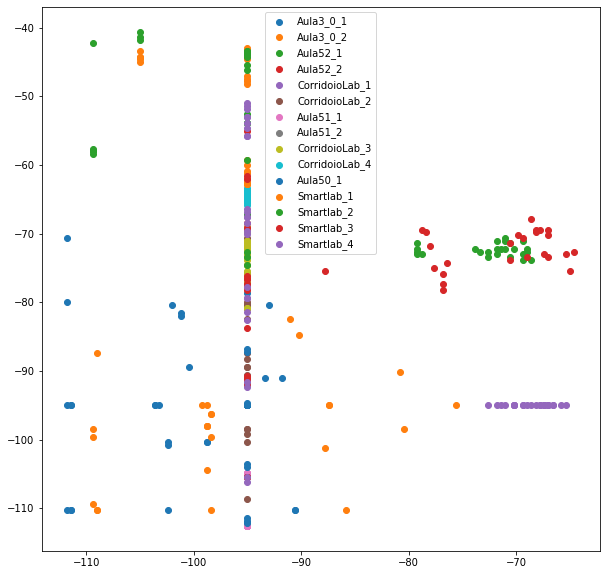

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
for z in data['zone'].unique():
    ax.scatter(data['itis-wifi'][data['zone'] == z], data['itis-pvt'][data['zone'] == z], marker='o', label=z)
plt.legend()
plt.show()

In [11]:
X = data[features]
y = data["zone"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

print(X_train.head())

     itis-wifi2  AP_ITISLI03_2.5  itis-wifi  wifi-itis  itis-pvt  wifi-lab01
222       -51.8            -95.0      -95.0      -55.8     -71.8       -95.0
119       -95.0            -66.2      -65.4      -95.0     -95.0       -67.8
80        -95.0            -70.2      -76.8      -95.0     -78.2       -71.4
88        -95.0            -69.4      -67.0      -95.0     -70.2       -74.2
236       -47.8            -95.0      -95.0      -67.8     -64.2       -95.0


In [13]:
depth = range(1,8)
train_score = []
test_score = []

for d in depth:
    net_classifier = RandomForestClassifier(max_depth=d, n_estimators=150)
    net_classifier.fit(X_train, y_train)
    train_score.append(net_classifier.score(X_train, y_train))
    test_score.append(net_classifier.score(X_test, y_test))

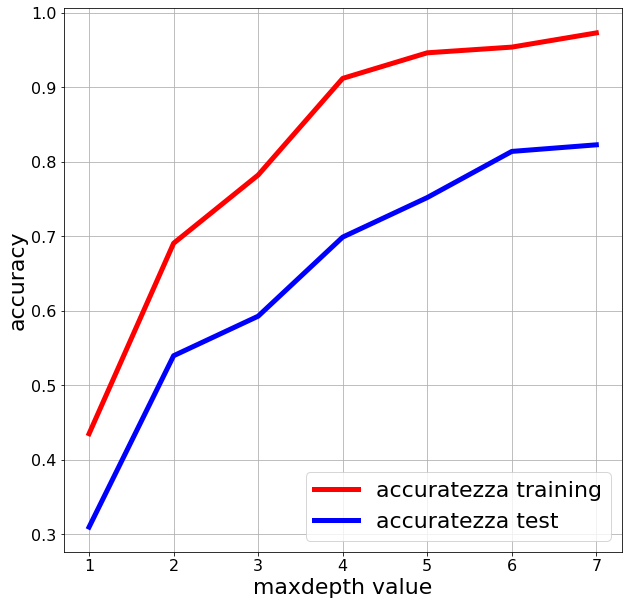

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(depth, train_score, color='r', label='accuratezza training', linewidth=5)
ax.plot(depth, test_score, color='b', label='accuratezza test', linewidth=5)
ax.tick_params(axis="both", labelsize=16)
ax.set_xlabel('maxdepth value', fontsize=22)
ax.set_ylabel('accuracy', fontsize=22)
ax.legend(fontsize=22)
ax.grid("both")
plt.show()

In [15]:
for i, f in enumerate(features):
    print(f"importanza di {f}: {net_classifier.feature_importances_[i]:.2f}")

importanza di itis-wifi2: 0.18
importanza di AP_ITISLI03_2.5: 0.15
importanza di itis-wifi: 0.08
importanza di wifi-itis: 0.21
importanza di itis-pvt: 0.27
importanza di wifi-lab01: 0.10


In [17]:
from joblib import dump

dump(net_classifier, 'net_classifier.joblib')
#model = load('net_classifier.joblib')

['net_classifier.joblib']